In [156]:
import pandas as pd
# Pandas: Library for data manipulation and analysis, including DataFrame structures.

pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [157]:
import matplotlib.pyplot as plt
# Matplotlib: Library for creating static, interactive, and animated visualizations.

%matplotlib inline
# IPython magic command to display Matplotlib plots inline in Jupyter notebooks.

import seaborn as sns
sns.set_style('darkgrid')
# Seaborn: Library for statistical data visualization built on top of Matplotlib. 
# Set the default style for Seaborn plots to 'darkgrid'.

import warnings
warnings.filterwarnings("ignore")

In [158]:
df_workorder_tasks_one_hot_encoded_daily = pd.read_csv('split_out_data.csv')

In [159]:
df_workorder_tasks_one_hot_encoded_daily.head()

date  Work_Orders  Adelaide_ITA  Brisbane_ITA  Melbourne_ITA   
0  2020-05-15           20             2             7              3  \
1  2020-05-16            6             0             1              1   
2  2020-05-17            5             0             1              2   
3  2020-05-18           22             0             7              5   
4  2020-05-19           23             0            10              5   

   Perth_IDC  Villawood_IDC  Yongah_Hill_IDC  month  year  day_of_week   
0          2              3                3      5  2020            4  \
1          0              4                0      5  2020            5   
2          0              2                0      5  2020            6   
3          3              6                1      5  2020            0   
4          0              5                3      5  2020            1   

   day_of_month  day_of_year  Work_Orders_Lag_1  Work_Orders_step_1   
0            15          136            20.0000              6.0000  \
1            16          137            20.0000              5.0000   
2            17          138             6.0000             22.0000   
3            18          139             5.0000             23.0000   
4            19          140            22.0000             35.0000   

   Work_Orders_Lag_2  Work_Orders_step_2  Work_Orders_Lag_3   
0            28.0000              5.0000            30.0000  \
1            20.0000             22.0000            28.0000   
2            20.0000             23.0000            20.0000   
3             6.0000             35.0000            20.0000   
4             5.0000             20.0000             6.0000   

   Work_Orders_step_3  Work_Orders_Lag_4  Work_Orders_step_4   
0             22.0000            23.0000             23.0000  \
1             23.0000            30.0000             35.0000   
2             35.0000            28.0000             20.0000   
3             20.0000            20.0000             23.0000   
4             23.0000            20.0000              9.0000   

   Work_Orders_Lag_5  Work_Orders_step_5  Work_Orders_Lag_6   
0             9.0000             35.0000             8.0000  \
1            23.0000             20.0000             9.0000   
2            30.0000             23.0000            23.0000   
3            28.0000              9.0000            30.0000   
4            20.0000              2.0000            28.0000   

   Work_Orders_step_6  Work_Orders_Lag_7  Work_Orders_step_7   
0             20.0000            22.0000             23.0000  \
1             23.0000             8.0000              9.0000   
2              9.0000             9.0000              2.0000   
3              2.0000            23.0000             17.0000   
4             17.0000            30.0000             28.0000   

   Work_Orders_Lag_8  Work_Orders_step_8  Work_Orders_Lag_9   
0            24.0000              9.0000            25.0000  \
1            22.0000              2.0000            24.0000   
2             8.0000             17.0000            22.0000   
3             9.0000             28.0000             8.0000   
4            23.0000             30.0000             9.0000   

   Work_Orders_step_9  Work_Orders_Lag_10  Work_Orders_step_10   
0              2.0000             30.0000              17.0000  \
1             17.0000             25.0000              28.0000   
2             28.0000             24.0000              30.0000   
3             30.0000             22.0000              28.0000   
4             28.0000              8.0000              37.0000   

   Work_Orders_Lag_11  Work_Orders_step_11  Work_Orders_Lag_12   
0             19.0000              28.0000              7.0000  \
1             30.0000              30.0000             19.0000   
2             25.0000              28.0000             30.0000   
3             24.0000              37.0000             25.0000   
4             22.0000              16.0000             24.0000  

In [160]:
df_workorder_tasks_one_hot_encoded_daily['date'] = pd.to_datetime(df_workorder_tasks_one_hot_encoded_daily['date'])

In [161]:
df_workorder_tasks_one_hot_encoded_daily.duplicated().sum()

0

In [162]:
# Read the Parquet files into Pandas DataFrames
workorder_pids_df = pd.read_parquet("Workorder_PIDs.parquet")
workorder_tasks_df = pd.read_parquet("Workorder_Tasks.parquet")

# Merge workorder tasks and pids data
merged_df = pd.merge(workorder_tasks_df, workorder_pids_df, left_on='WorkOrder_Name', right_on='Work_Order_Number__c')
del workorder_tasks_df, workorder_pids_df

# Feature Engineering - Derived Date Features
merged_df.dropna(subset=['Detainee_Pickup_Time_With_Offset__c'],inplace=True)
merged_df.sort_values(by=['Detainee_Pickup_Time_With_Offset__c'], inplace=True)
merged_df.loc[:,'Detainee_Pickup_Time_With_Offset__c'] = merged_df.Detainee_Pickup_Time_With_Offset__c.dt.round('H')
merged_df.loc[:,'date'] = pd.to_datetime(merged_df.Detainee_Pickup_Time_With_Offset__c.dt.date)
merged_df['month'] = merged_df['Detainee_Pickup_Time_With_Offset__c'].dt.month
merged_df['year'] = merged_df['Detainee_Pickup_Time_With_Offset__c'].dt.year
merged_df['day_of_week'] = merged_df['Detainee_Pickup_Time_With_Offset__c'].dt.dayofweek
merged_df['week_of_year'] = merged_df['Detainee_Pickup_Time_With_Offset__c'].dt.isocalendar().week
merged_df['day_of_month'] = merged_df['Detainee_Pickup_Time_With_Offset__c'].dt.day
merged_df['day_of_year'] = merged_df['Detainee_Pickup_Time_With_Offset__c'].dt.dayofyear

# Feature Engineering - Derived Date Features
merged_df['minute_start'] = merged_df['Staff_Start_With_Offset__c'].dt.minute
merged_df['hour_start'] = merged_df['Staff_Start_With_Offset__c'].dt.hour

workorder = merged_df.groupby(['Facility_Name__c', 'date'])['Work_Order_Number__c'].count().reset_index().rename(columns={'Work_Order_Number__c':'Work_Order_Number'})
merged_df = pd.merge(merged_df,workorder,how='left',on=['Facility_Name__c', 'date'])
merged_df.Work_Order_Number.fillna(0, inplace=True)
del workorder

merged_df['duration_bin_m'] = ((merged_df.Staff_Finish_With_Offset__c - merged_df.Staff_Start_With_Offset__c).dt.total_seconds() / 3600).round()

merged_df = merged_df[merged_df.date.isin(df_workorder_tasks_one_hot_encoded_daily.date)]

In [163]:
merged_df.head()

WorkOrder_Name ASAP_Approver_Name_and_Date_Time__c Approval_Status__c   
175317    WO-00274841                                None           --None--  \
175318    WO-00274841                                None           --None--   
175319    WO-00274841                                None           --None--   
175320    WO-00274841                                None           --None--   
175321    WO-00274587                                None           Approved   

       Approved_Billable_Additional_Officers__c   
175317                                     None  \
175318                                     None   
175319                                     None   
175320                                     None   
175321                                     None   

       Date_Time_Referral_Received_With_Offset__c   
175317                        2020-05-13 14:00:00  \
175318                        2020-05-13 14:00:00   
175319                        2020-05-13 14:00:00   
175320                        2020-05-13 14:00:00   
175321                        2020-05-11 12:35:00   

       Arrival_at_Destination_With_Offset__c Appointment_Time_With_Offset__c   
175317                   2020-05-15 19:45:00                             NaT  \
175318                   2020-05-15 19:45:00                             NaT   
175319                   2020-05-15 19:45:00                             NaT   
175320                   2020-05-15 19:45:00                             NaT   
175321                   2020-05-15 07:35:00                             NaT   

       Departure_from_Destination_With_Offset__c   
175317                       2020-05-16 07:20:00  \
175318                       2020-05-16 07:20:00   
175319                       2020-05-16 07:20:00   
175320                       2020-05-16 07:20:00   
175321                       2020-05-15 07:58:00   

       Detainee_Drop_Off_Time_With_Offset__c   
175317                   2020-05-16 19:50:00  \
175318                   2020-05-16 19:50:00   
175319                   2020-05-16 19:50:00   
175320                   2020-05-16 19:50:00   
175321                   2020-05-15 08:17:00   

       Detainee_Pickup_Time_With_Offset__c Escort_Risk_Assessment__c   
175317                 2020-05-15 06:00:00                      High  \
175318                 2020-05-15 06:00:00                      High   
175319                 2020-05-15 06:00:00                      High   
175320                 2020-05-15 06:00:00                      High   
175321                 2020-05-15 07:00:00                      High   

       Escorted_From_Location_Name__c             Escort_Activity_Type__c   
175317                   Brisbane ITA  Transfer between Facilities Escort  \
175318                   Brisbane ITA  Transfer between Facilities Escort   
175319                   Brisbane ITA  Transfer between Facilities Escort   
175320                   Brisbane ITA  Transfer between Facilities Escort   
175321                   Brisbane ITA          Local Transport and Escort   

       Escorted_Return_Location_Name__c Escorted_To_Location_Name__c   
175317                     Brisbane ITA                Villawood IDC  \
175318                     Brisbane ITA                Villawood IDC   
175319                     Brisbane ITA                Villawood IDC   
175320                     Brisbane ITA                Villawood IDC   
175321                     Brisbane ITA               Meriton Suites   

       Facility_Name__c Facility_WBS_Code__c Location_Risk_Assessment__c   
175317     Brisbane ITA       E.007203.19.01                      Medium  \
175318     Brisbane ITA       E.007203.19.01                      Medium   
175319     Brisbane ITA       E.007203.19.01                      Medium   
175320     Brisbane ITA       E.007203.19.01                      Medium   
175321     Brisbane ITA       E.007203.19.01                        High   

       Location_Risk_Assessment

In [164]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25026 entries, 175317 to 200342
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   WorkOrder_Name                              25026 non-null  object        
 1   ASAP_Approver_Name_and_Date_Time__c         0 non-null      object        
 2   Approval_Status__c                          16651 non-null  object        
 3   Approved_Billable_Additional_Officers__c    2064 non-null   object        
 4   Date_Time_Referral_Received_With_Offset__c  25026 non-null  datetime64[ns]
 5   Arrival_at_Destination_With_Offset__c       22890 non-null  datetime64[ns]
 6   Appointment_Time_With_Offset__c             639 non-null    datetime64[ns]
 7   Departure_from_Destination_With_Offset__c   21906 non-null  datetime64[ns]
 8   Detainee_Drop_Off_Time_With_Offset__c       22605 non-null  datetime64[ns]
 9   Detai

In [165]:
merged_big_df = pd.merge(merged_df, df_workorder_tasks_one_hot_encoded_daily, how='left', on=['date', 'month','year','day_of_week','day_of_month','day_of_year'])
merged_big_df.head()

WorkOrder_Name ASAP_Approver_Name_and_Date_Time__c Approval_Status__c   
0    WO-00274841                                None           --None--  \
1    WO-00274841                                None           --None--   
2    WO-00274841                                None           --None--   
3    WO-00274841                                None           --None--   
4    WO-00274587                                None           Approved   

  Approved_Billable_Additional_Officers__c   
0                                     None  \
1                                     None   
2                                     None   
3                                     None   
4                                     None   

  Date_Time_Referral_Received_With_Offset__c   
0                        2020-05-13 14:00:00  \
1                        2020-05-13 14:00:00   
2                        2020-05-13 14:00:00   
3                        2020-05-13 14:00:00   
4                        2020-05-11 12:35:00   

  Arrival_at_Destination_With_Offset__c Appointment_Time_With_Offset__c   
0                   2020-05-15 19:45:00                             NaT  \
1                   2020-05-15 19:45:00                             NaT   
2                   2020-05-15 19:45:00                             NaT   
3                   2020-05-15 19:45:00                             NaT   
4                   2020-05-15 07:35:00                             NaT   

  Departure_from_Destination_With_Offset__c   
0                       2020-05-16 07:20:00  \
1                       2020-05-16 07:20:00   
2                       2020-05-16 07:20:00   
3                       2020-05-16 07:20:00   
4                       2020-05-15 07:58:00   

  Detainee_Drop_Off_Time_With_Offset__c Detainee_Pickup_Time_With_Offset__c   
0                   2020-05-16 19:50:00                 2020-05-15 06:00:00  \
1                   2020-05-16 19:50:00                 2020-05-15 06:00:00   
2                   2020-05-16 19:50:00                 2020-05-15 06:00:00   
3                   2020-05-16 19:50:00                 2020-05-15 06:00:00   
4                   2020-05-15 08:17:00                 2020-05-15 07:00:00   

  Escort_Risk_Assessment__c Escorted_From_Location_Name__c   
0                      High                   Brisbane ITA  \
1                      High                   Brisbane ITA   
2                      High                   Brisbane ITA   
3                      High                   Brisbane ITA   
4                      High                   Brisbane ITA   

              Escort_Activity_Type__c Escorted_Return_Location_Name__c   
0  Transfer between Facilities Escort                     Brisbane ITA  \
1  Transfer between Facilities Escort                     Brisbane ITA   
2  Transfer between Facilities Escort                     Brisbane ITA   
3  Transfer between Facilities Escort                     Brisbane ITA   
4          Local Transport and Escort                     Brisbane ITA   

  Escorted_To_Location_Name__c Facility_Name__c Facility_WBS_Code__c   
0                Villawood IDC     Brisbane ITA       E.007203.19.01  \
1                Villawood IDC     Brisbane ITA       E.007203.19.01   
2                Villawood IDC     Brisbane ITA       E.007203.19.01   
3                Villawood IDC     Brisbane ITA       E.007203.19.01   
4               Meriton Suites     Brisbane ITA       E.007203.19.01   

  Location_Risk_Assessment__c Location_Risk_Assessment_Escorted_To__c   
0                      Medium                                  Medium  \
1                      Medium                                  Medium   
2                      Medium                                  Medium   
3                      Medium                                  Medium   
4                        High                                    High   

        Nature_of_Service__c Number_of_Officers_Required__c Number_of_PIDs__c   
0    

In [166]:
merged_big_df = merged_big_df[df_workorder_tasks_one_hot_encoded_daily.columns.to_list() + ['Facility_Name__c','duration_bin_m', 'Location_Risk_Assessment__c', 'Escort_Risk_Assessment__c', 'Work_Order_Number']]
merged_big_df.head()

date  Work_Orders  Adelaide_ITA  Brisbane_ITA  Melbourne_ITA   
0 2020-05-15           20             2             7              3  \
1 2020-05-15           20             2             7              3   
2 2020-05-15           20             2             7              3   
3 2020-05-15           20             2             7              3   
4 2020-05-15           20             2             7              3   

   Perth_IDC  Villawood_IDC  Yongah_Hill_IDC  month  year  day_of_week   
0          2              3                3      5  2020            4  \
1          2              3                3      5  2020            4   
2          2              3                3      5  2020            4   
3          2              3                3      5  2020            4   
4          2              3                3      5  2020            4   

   day_of_month  day_of_year  Work_Orders_Lag_1  Work_Orders_step_1   
0            15          136            20.0000              6.0000  \
1            15          136            20.0000              6.0000   
2            15          136            20.0000              6.0000   
3            15          136            20.0000              6.0000   
4            15          136            20.0000              6.0000   

   Work_Orders_Lag_2  Work_Orders_step_2  Work_Orders_Lag_3   
0            28.0000              5.0000            30.0000  \
1            28.0000              5.0000            30.0000   
2            28.0000              5.0000            30.0000   
3            28.0000              5.0000            30.0000   
4            28.0000              5.0000            30.0000   

   Work_Orders_step_3  Work_Orders_Lag_4  Work_Orders_step_4   
0             22.0000            23.0000             23.0000  \
1             22.0000            23.0000             23.0000   
2             22.0000            23.0000             23.0000   
3             22.0000            23.0000             23.0000   
4             22.0000            23.0000             23.0000   

   Work_Orders_Lag_5  Work_Orders_step_5  Work_Orders_Lag_6   
0             9.0000             35.0000             8.0000  \
1             9.0000             35.0000             8.0000   
2             9.0000             35.0000             8.0000   
3             9.0000             35.0000             8.0000   
4             9.0000             35.0000             8.0000   

   Work_Orders_step_6  Work_Orders_Lag_7  Work_Orders_step_7   
0             20.0000            22.0000             23.0000  \
1             20.0000            22.0000             23.0000   
2             20.0000            22.0000             23.0000   
3             20.0000            22.0000             23.0000   
4             20.0000            22.0000             23.0000   

   Work_Orders_Lag_8  Work_Orders_step_8  Work_Orders_Lag_9   
0            24.0000              9.0000            25.0000  \
1            24.0000              9.0000            25.0000   
2            24.0000              9.0000            25.0000   
3            24.0000              9.0000            25.0000   
4            24.0000              9.0000            25.0000   

   Work_Orders_step_9  Work_Orders_Lag_10  Work_Orders_step_10   
0              2.0000             30.0000              17.0000  \
1              2.0000             30.0000              17.0000   
2              2.0000             30.0000              17.0000   
3              2.0000             30.0000              17.0000   
4              2.0000             30.0000              17.0000   

   Work_Orders_Lag_11  Work_Orders_step_11  Work_Orders_Lag_12   
0             19.0000              28.0000              7.0000  \
1             19.0000              28.0000              7.0000   
2             19.0000              28.0000              7.0000   
3             19.0000              28.0000              7.0000   
4             19.0000              28.0000              7.0000   

  

In [167]:
import plotly.express as px

px.histogram(merged_big_df.Work_Order_Number)

In [168]:
px.box(merged_big_df.Work_Order_Number)

In [169]:
merged_big_df = merged_big_df[merged_big_df.Work_Order_Number <= 24]
px.histogram(merged_big_df.Work_Order_Number)

In [170]:
px.box(merged_big_df.Work_Order_Number)

In [171]:
px.histogram(merged_big_df.duration_bin_m)

In [172]:
px.box(merged_big_df.duration_bin_m)

In [173]:
merged_big_df = merged_big_df[merged_big_df.duration_bin_m <= 12]
px.histogram(merged_big_df.duration_bin_m)

In [174]:
px.box(merged_big_df.duration_bin_m)

In [175]:
merged_big_df['duration_bin'] = ''
merged_big_df.duration_bin.loc[merged_big_df.duration_bin_m >= 5] = '4+ hour bin'
merged_big_df.duration_bin.loc[merged_big_df.duration_bin_m < 5] = '4 hour bin'
merged_big_df.duration_bin.loc[merged_big_df.duration_bin_m < 4] = '3 hour bin'
merged_big_df.duration_bin.loc[merged_big_df.duration_bin_m < 3] = '2 hour bin'
merged_big_df.duration_bin.loc[merged_big_df.duration_bin_m < 2] = '1 hour bin'
merged_big_df.drop('duration_bin_m', axis=1, inplace=True)
merged_big_df.duration_bin.value_counts()

duration_bin
4+ hour bin    6761
2 hour bin     5280
3 hour bin     3949
4 hour bin     3449
1 hour bin     3040
Name: count, dtype: int64

In [176]:
merged_big_df.rename(columns={'Work_Order_Number':'WO_Vol'}, inplace=True)
merged_big_df.set_index('date', inplace=True)
merged_big_df.drop([col for col in merged_big_df if 'step' in col or 'Lag' in col], axis=1, inplace=True)
merged_big_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22479 entries, 2020-05-15 to 2022-12-02
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Work_Orders                  22479 non-null  int64 
 1   Adelaide_ITA                 22479 non-null  int64 
 2   Brisbane_ITA                 22479 non-null  int64 
 3   Melbourne_ITA                22479 non-null  int64 
 4   Perth_IDC                    22479 non-null  int64 
 5   Villawood_IDC                22479 non-null  int64 
 6   Yongah_Hill_IDC              22479 non-null  int64 
 7   month                        22479 non-null  int32 
 8   year                         22479 non-null  int32 
 9   day_of_week                  22479 non-null  int32 
 10  day_of_month                 22479 non-null  int32 
 11  day_of_year                  22479 non-null  int32 
 12  Facility_Name__c             22479 non-null  object
 13  Location_Risk_

In [177]:
merged_big_df.head()

Work_Orders  Adelaide_ITA  Brisbane_ITA  Melbourne_ITA  Perth_IDC   
date                                                                            
2020-05-15           20             2             7              3          2  \
2020-05-15           20             2             7              3          2   
2020-05-15           20             2             7              3          2   
2020-05-15           20             2             7              3          2   
2020-05-15           20             2             7              3          2   

            Villawood_IDC  Yongah_Hill_IDC  month  year  day_of_week   
date                                                                   
2020-05-15              3                3      5  2020            4  \
2020-05-15              3                3      5  2020            4   
2020-05-15              3                3      5  2020            4   
2020-05-15              3                3      5  2020            4   
2020-05-15              3                3      5  2020            4   

            day_of_month  day_of_year                       Facility_Name__c   
date                                                                           
2020-05-15            15          136                           Brisbane ITA  \
2020-05-15            15          136  North West Point Immigration Facility   
2020-05-15            15          136  North West Point Immigration Facility   
2020-05-15            15          136                              Perth IDC   
2020-05-15            15          136                          Melbourne ITA   

           Location_Risk_Assessment__c Escort_Risk_Assessment__c  WO_Vol   
date                                                                       
2020-05-15                        High                      High      10  \
2020-05-15                      Medium                    Medium       4   
2020-05-15                      Medium                    Medium       4   
2020-05-15                         Low                    Medium       2   
2020-05-15                        High                      High       4   

           duration_bin  
date                     
2020-05-15   3 hour bin  
2020-05-15   1 hour bin  
2020-05-15   1 hour bin  
2020-05-15   3 hour bin  
2020-05-15   4 hour bin

In [178]:
merged_big_df.columns[:-5]

Index(['Work_Orders', 'Adelaide_ITA', 'Brisbane_ITA', 'Melbourne_ITA',
       'Perth_IDC', 'Villawood_IDC', 'Yongah_Hill_IDC', 'month', 'year',
       'day_of_week', 'day_of_month', 'day_of_year'],
      dtype='object')

In [179]:
merged_big_df['workorder_id'] = merged_big_df.groupby(merged_big_df.columns[:-5].to_list()).cumcount() + 1

In [180]:
px.histogram(merged_big_df['workorder_id'])

In [181]:
px.box(merged_big_df['workorder_id'])

In [182]:
merged_big_df = merged_big_df[merged_big_df['workorder_id'] <= 52]
px.histogram(merged_big_df['workorder_id'])

In [183]:
px.box(merged_big_df['workorder_id'])

In [184]:
merged_big_df.dropna(inplace=True)
merged_big_df.isna().sum().sum()

0

In [185]:
merged_big_df.duplicated().sum()

0

In [186]:
merged_big_df.drop_duplicates(inplace=True)

In [187]:
merged_big_df['Facility_Name__c'].value_counts()

Facility_Name__c
Villawood IDC                            4865
Brisbane ITA                             4588
Melbourne ITA                            3530
Yongah Hill IDC                          3191
North West Point Immigration Facility    2990
Perth IDC                                1792
Adelaide ITA                              697
Northern APOD                             351
Maribyrnong IDC                             1
Name: count, dtype: int64

In [188]:
merged_big_df['Location_Risk_Assessment__c'].value_counts()

Location_Risk_Assessment__c
High       18055
Medium      2894
Low          968
Extreme       88
Name: count, dtype: int64

In [189]:
merged_big_df['Escort_Risk_Assessment__c'].value_counts()

Escort_Risk_Assessment__c
High       16463
Medium      4457
Low          631
Extreme      454
Name: count, dtype: int64

In [190]:
merged_big_df['duration_bin'].value_counts()

duration_bin
4+ hour bin    6613
2 hour bin     5159
3 hour bin     3877
4 hour bin     3380
1 hour bin     2976
Name: count, dtype: int64

In [151]:
merged_big_df = merged_big_df[merged_big_df.Facility_Name__c != 'Maribyrnong IDC']

In [152]:
merged_big_df.dtypes[merged_big_df.dtypes == 'object'].index.to_list()

['Facility_Name__c',
 'Location_Risk_Assessment__c',
 'Escort_Risk_Assessment__c',
 'duration_bin']

In [153]:
merged_big_df.Facility_Name__c.str.replace(' ','_').unique()

array(['Brisbane_ITA', 'North_West_Point_Immigration_Facility',
       'Perth_IDC', 'Melbourne_ITA', 'Adelaide_ITA', 'Villawood_IDC',
       'Yongah_Hill_IDC', 'Northern_APOD'], dtype=object)

In [154]:
merged_big_df['Facility_Name__c'].unique()

array(['Brisbane ITA', 'North West Point Immigration Facility',
       'Perth IDC', 'Melbourne ITA', 'Adelaide ITA', 'Villawood IDC',
       'Yongah Hill IDC', 'Northern APOD'], dtype=object)

In [155]:
def manual_encoding(col):

    col_ = col.copy()
    # Your list of category labels
    category_labels = col.unique()

    # Create a manual encoding dictionary
    manual_encodings = {label: index for index, label in enumerate(category_labels)}
    print(col.name,{value: key for key, value in manual_encodings.items()})
    # Apply manual encoding
    for label in category_labels:
        col_.loc[col_ == label] = manual_encodings[label]

    return col_

merged_big_df['Facility_Name__c'] = manual_encoding(merged_big_df['Facility_Name__c'])
merged_big_df['duration_bin'] = manual_encoding(merged_big_df['duration_bin'])
merged_big_df['Escort_Risk_Assessment__c'] = manual_encoding(merged_big_df['Escort_Risk_Assessment__c'])
merged_big_df['Location_Risk_Assessment__c'] = manual_encoding(merged_big_df['Location_Risk_Assessment__c'])

Facility_Name__c {0: 'Brisbane ITA', 1: 'North West Point Immigration Facility', 2: 'Perth IDC', 3: 'Melbourne ITA', 4: 'Adelaide ITA', 5: 'Villawood IDC', 6: 'Yongah Hill IDC', 7: 'Northern APOD'}
duration_bin {0: '3 hour bin', 1: '1 hour bin', 2: '4 hour bin', 3: '2 hour bin', 4: '4+ hour bin'}
Escort_Risk_Assessment__c {0: 'High', 1: 'Medium', 2: 'Extreme', 3: 'Low'}
Location_Risk_Assessment__c {0: 'High', 1: 'Medium', 2: 'Low', 3: 'Extreme'}


In [38]:
merged_big_df['Facility_Name__c'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=object)

In [39]:
merged_big_df['duration_bin'].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [40]:
merged_big_df['Escort_Risk_Assessment__c'].unique()

array([0, 1, 2, 3], dtype=object)

In [41]:
merged_big_df['Location_Risk_Assessment__c'].unique()

array([0, 1, 2, 3], dtype=object)

In [42]:
merged_big_df.duplicated().sum()

0

In [43]:
merged_big_df.head()

Work_Orders  Adelaide_ITA  Brisbane_ITA  Melbourne_ITA  Perth_IDC   
date                                                                            
2020-05-15           20             2             7              3          2  \
2020-05-15           20             2             7              3          2   
2020-05-15           20             2             7              3          2   
2020-05-15           20             2             7              3          2   
2020-05-15           20             2             7              3          2   

            Villawood_IDC  Yongah_Hill_IDC  month  year  day_of_week   
date                                                                   
2020-05-15              3                3      5  2020            4  \
2020-05-15              3                3      5  2020            4   
2020-05-15              3                3      5  2020            4   
2020-05-15              3                3      5  2020            4   
2020-05-15              3                3      5  2020            4   

            day_of_month  day_of_year Facility_Name__c   
date                                                     
2020-05-15            15          136                0  \
2020-05-15            15          136                1   
2020-05-15            15          136                1   
2020-05-15            15          136                2   
2020-05-15            15          136                3   

           Location_Risk_Assessment__c Escort_Risk_Assessment__c  WO_Vol   
date                                                                       
2020-05-15                           0                         0      10  \
2020-05-15                           1                         1       4   
2020-05-15                           1                         1       4   
2020-05-15                           2                         1       2   
2020-05-15                           0                         0       4   

           duration_bin  workorder_id  
date                                   
2020-05-15            0             1  
2020-05-15            1             2  
2020-05-15            1             3  
2020-05-15            0             4  
2020-05-15            2             5

In [44]:
merged_big_df.to_csv('merged_big_df_split_rd.csv')

In [152]:
X = merged_big_df.astype(float).drop(['WO_Vol','duration_bin','Escort_Risk_Assessment__c','Location_Risk_Assessment__c'], axis=1)
y_r = merged_big_df.astype(float)['WO_Vol']
y_c = merged_big_df.astype(float)[['duration_bin','Escort_Risk_Assessment__c','Location_Risk_Assessment__c']]

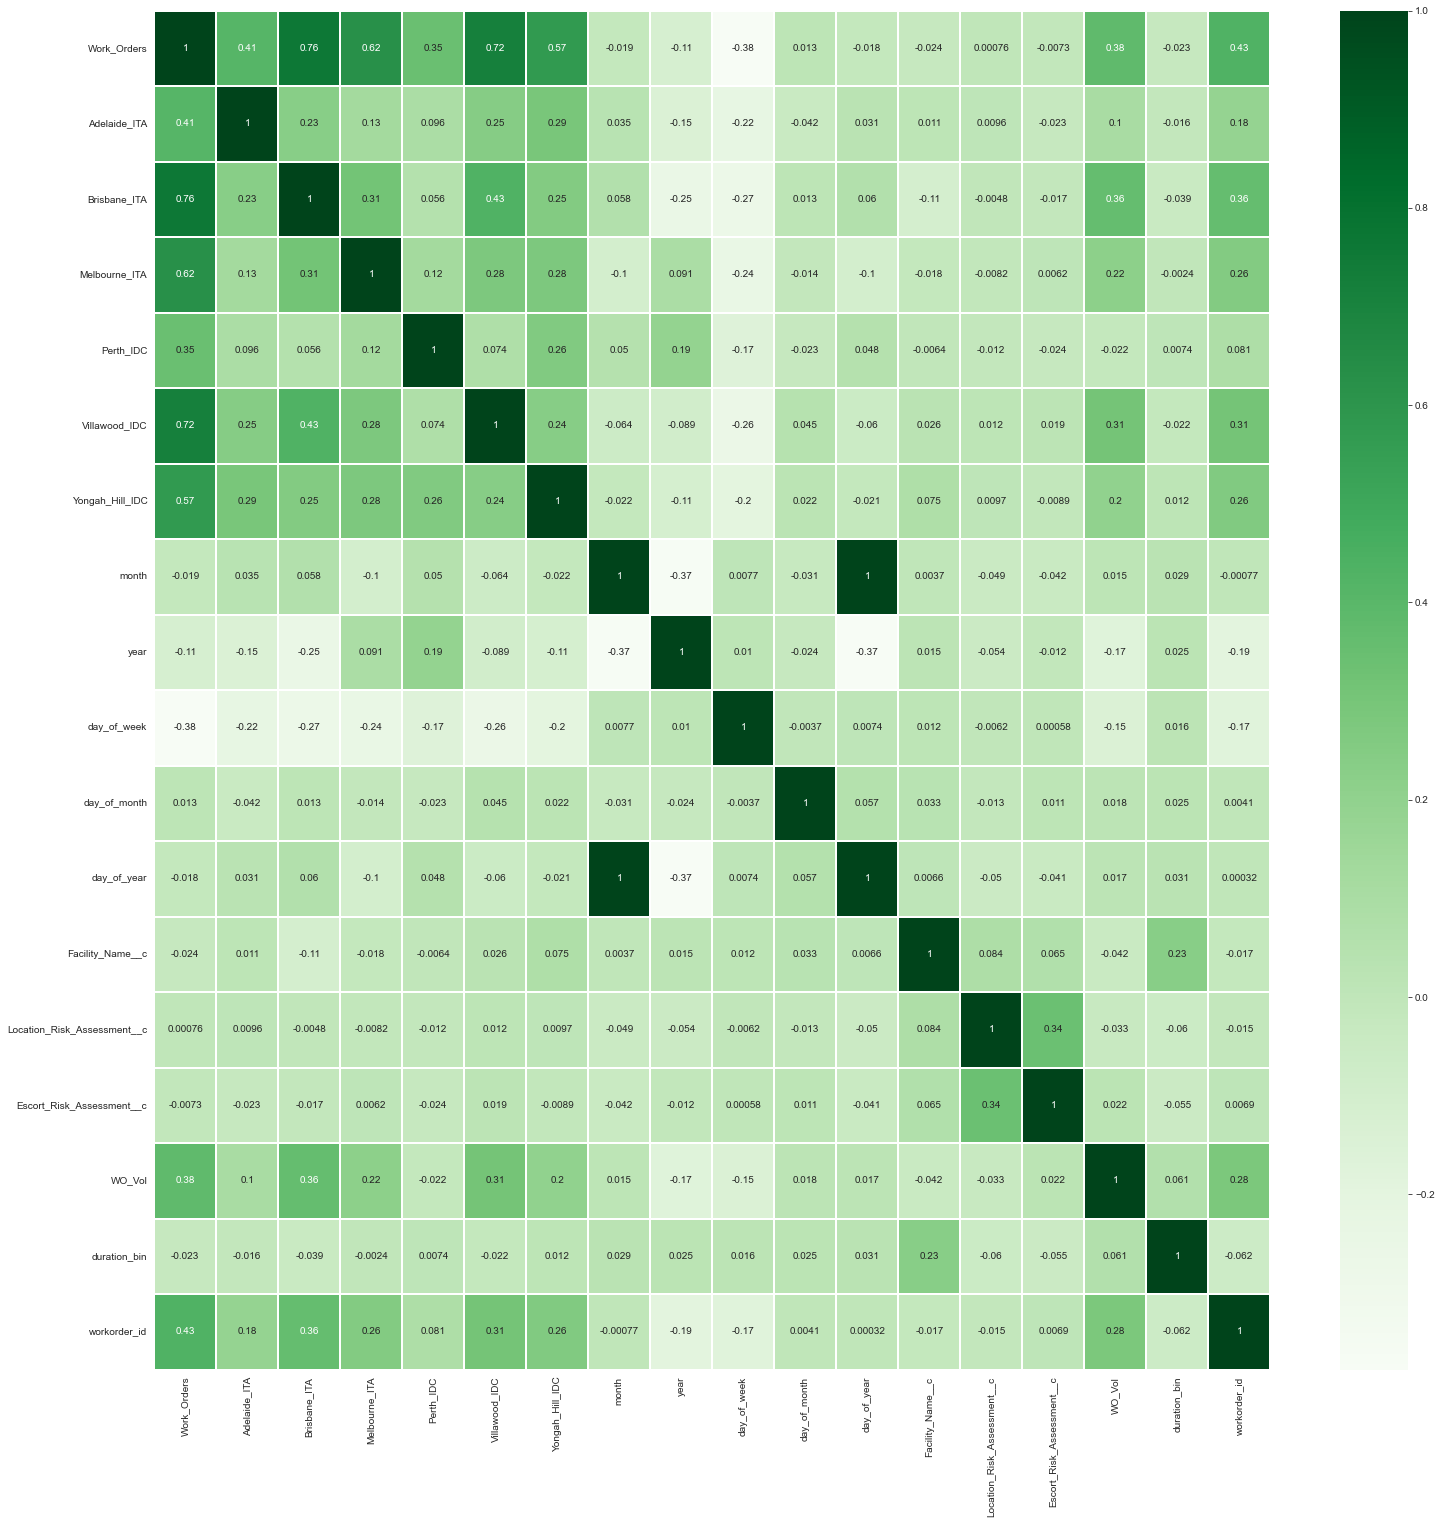

In [153]:
plt.figure(figsize=(25, 25))
sns.heatmap(merged_big_df.corr(), annot=True, cmap="Greens", linewidths=0.1, annot_kws={"fontsize":10});

In [154]:
merged_big_df.shape

(22004, 18)

In [155]:
import numpy as np
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [156]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_r, test_size=0.2, random_state=42, shuffle=False)

# Make predictions on the test set
model = XGBRegressor(random_state=42,
                     objective='reg:squarederror',  # Regression task
                    eval_metric='rmse',  # Evaluation metric (Root Mean Squared Error)
                    n_estimators=100,  # Number of boosting rounds
                    booster='gbtree',  # Use tree-based boosting  
                          )
                          
model.fit(X_train, y_train)
predictions = model.predict(X_test).round()

xgb_rmse = np.sqrt(mean_squared_error(y_test, predictions))
xgb_mae = mean_absolute_error(y_test, predictions)
xgb_R2 = r2_score(y_test, predictions)

print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost R2: {xgb_R2}")

XGBoost RMSE: 3.3736485003020236
XGBoost MAE: 2.0813451488298114
XGBoost R2: 0.470270688909749


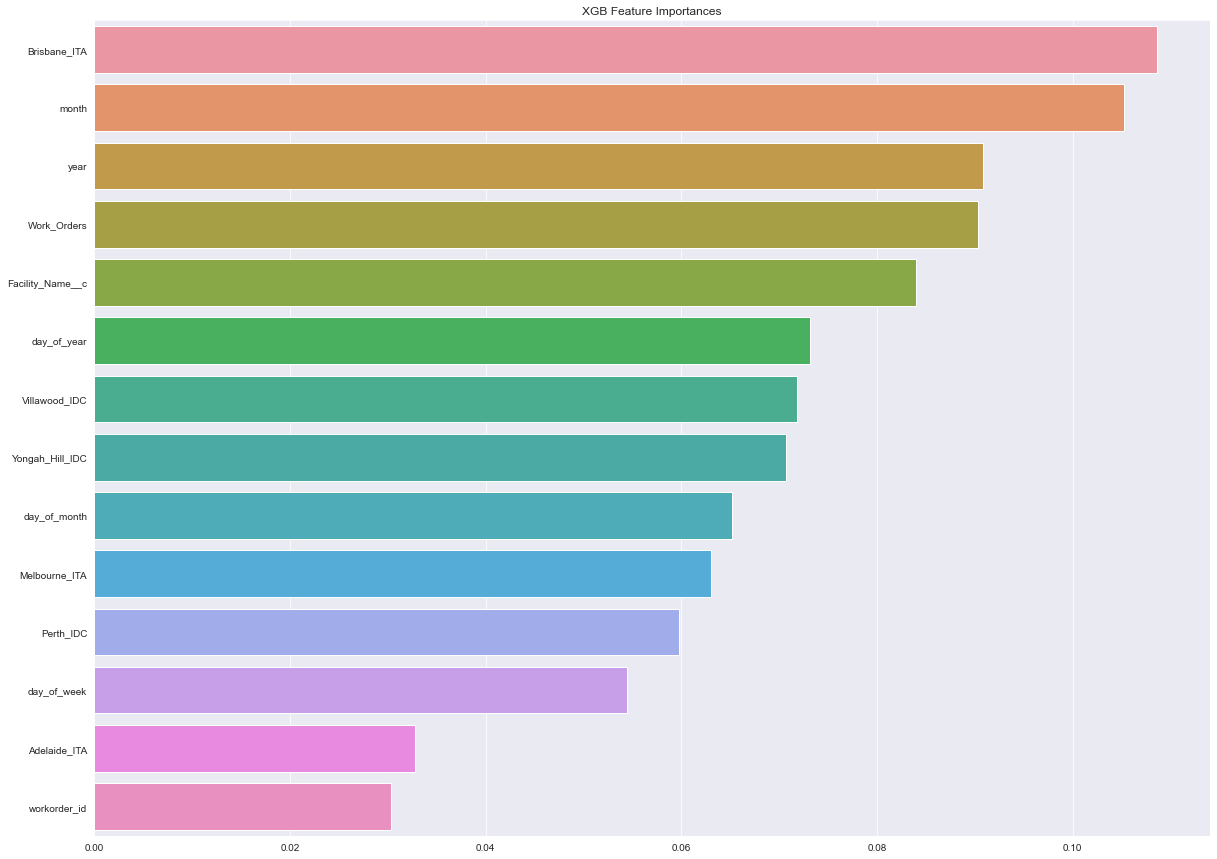

In [157]:
# Get XGBoost feature importances
xgb_feature_importances = model.feature_importances_
xgb_feature_importances_dict = {}

for feature, importance in zip(X_train.columns, xgb_feature_importances):
    xgb_feature_importances_dict[feature] = importance

# Create a figure with the desired size
plt.figure(figsize=(20, 15))  # Adjust the width and height as per your preference


# Assuming you have already defined `feature_importances` and `np.abs(feature_importances)`
xgb_feature_importances = pd.Series(xgb_feature_importances_dict.values(),index=xgb_feature_importances_dict.keys()).abs().sort_values(ascending=False)
sns.barplot(x=xgb_feature_importances, y=xgb_feature_importances.index)
# Display the plot
plt.title(f'XGB Feature Importances')
plt.show()

In [158]:
xgb_feature_importances.to_csv('WO_vol_fi.csv', header=False)

<Axes: xlabel='date'>

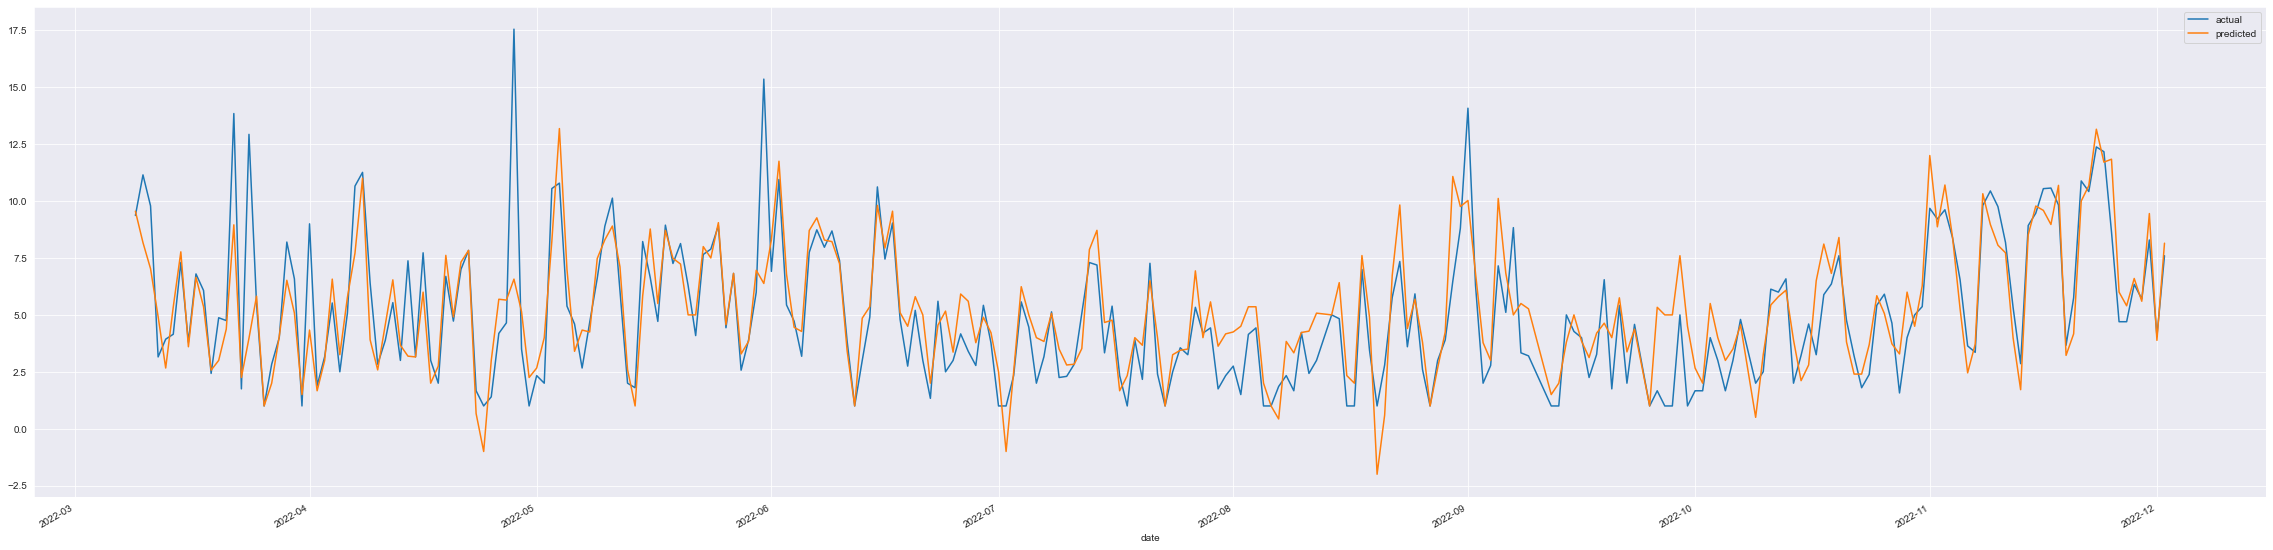

In [159]:
df_pred = pd.DataFrame(index=X_test.index)


df_pred['actual'] = y_test.values
df_pred['predicted'] = predictions

df_pred.groupby(df_pred.index).mean().plot(kind='line', figsize=(40,10))

In [160]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.05, 0.1, 0.3],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

# Make predictions on the test set
base_model = XGBRegressor(random_state=42,
                     objective='reg:squarederror',  # Regression task
                    eval_metric='rmse',  # Evaluation metric (Root Mean Squared Error)
                    booster='gbtree',  # Use tree-based boosting  
                          )

# Initialize GridSearchCV
clf = GridSearchCV(estimator=base_model, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1,
                   n_jobs=-1)

# Fit the GridSearchCV on the training data
clf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = clf.best_estimator_

# Make predictions on the test set using the best model
predictions = best_model.predict(X_test).round()

# Calculate evaluation metrics
xgb_rmse = np.sqrt(mean_squared_error(y_test, predictions))
xgb_mae = mean_absolute_error(y_test, predictions)
xgb_R2 = r2_score(y_test, predictions)

print("Best Hyperparameters:", clf.best_params_)
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost R2: {xgb_R2}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits


Best Hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}
XGBoost RMSE: 3.5003489292748737
XGBoost MAE: 2.4592138150420357
XGBoost R2: 0.42973460487283677


<Axes: xlabel='date'>

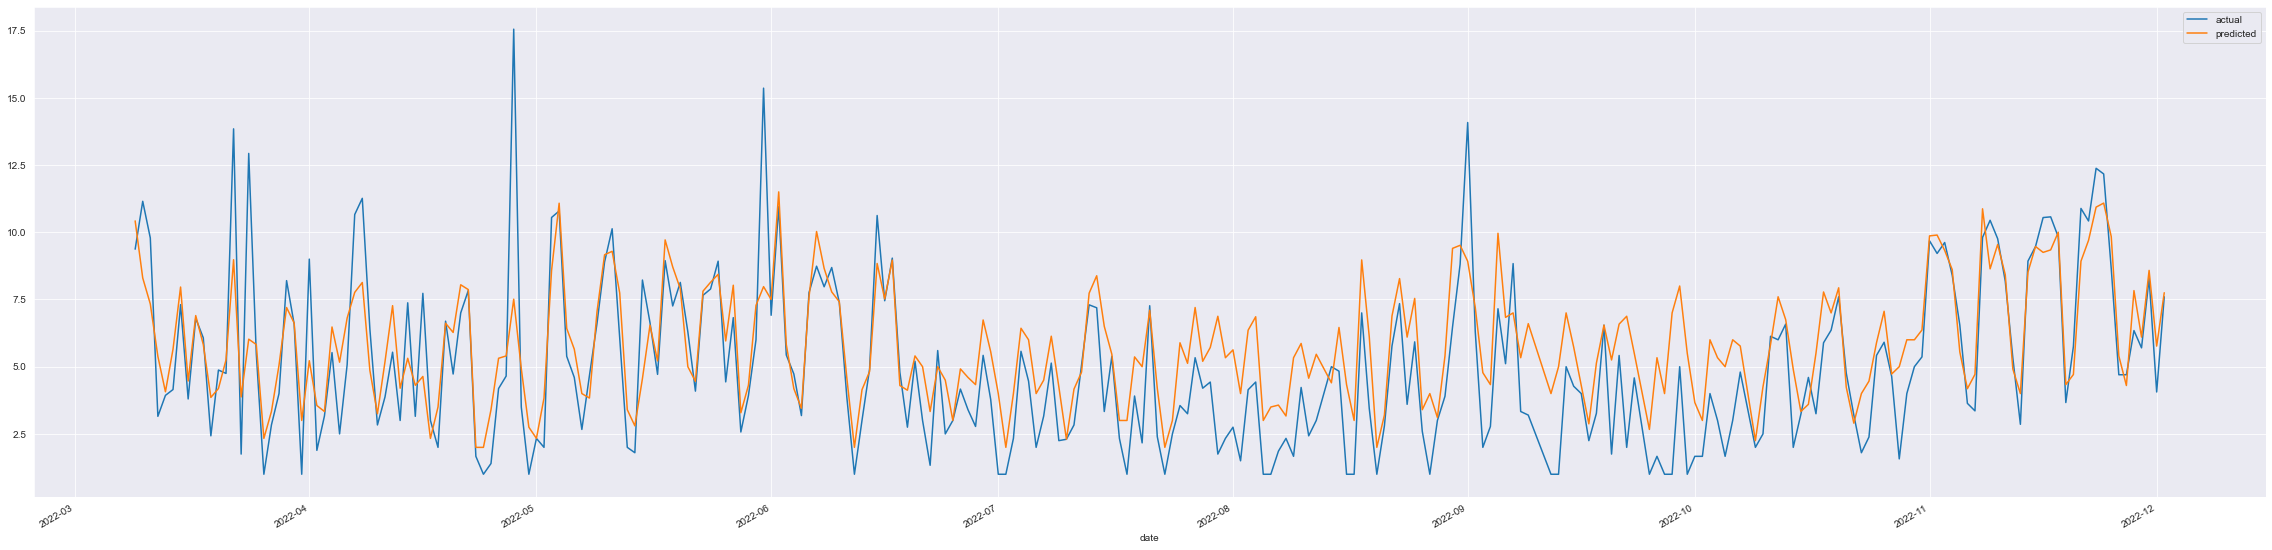

In [161]:
df_pred = pd.DataFrame(index=X_test.index)


df_pred['actual'] = y_test.values
df_pred['predicted'] = predictions

df_pred.groupby(df_pred.index).mean().plot(kind='line', figsize=(40,10))

In [162]:
import joblib

In [163]:
df_pred.to_csv('prediction_WO_vol.csv')

# Save the trained XGBoost model
model.fit(X, y_r)
xgb_model_filename = 'xgb_model_WO_vol.pkl'
joblib.dump(model, xgb_model_filename)

['xgb_model_WO_vol.pkl']

126.16796946009816 % of the records used after balancing duration_bin
Fitting 5 folds for each of 54 candidates, totalling 270 fits
XGB best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 500}
XGB Accuracy for duration_bin : 0.6763911399243652


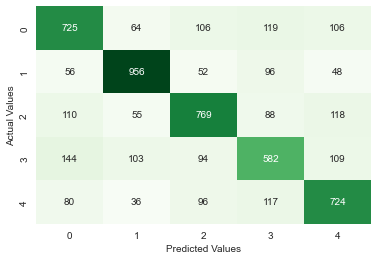

291.0470823486639 % of the records used after balancing Escort_Risk_Assessment__c
Fitting 5 folds for each of 54 candidates, totalling 270 fits
XGB best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 1000}
XGB Accuracy for Escort_Risk_Assessment__c : 0.9333281286595363


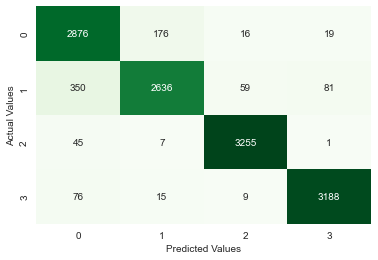

323.4957280494456 % of the records used after balancing Location_Risk_Assessment__c
Fitting 5 folds for each of 54 candidates, totalling 270 fits
XGB best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}
XGB Accuracy for Location_Risk_Assessment__c : 0.9598229964177847


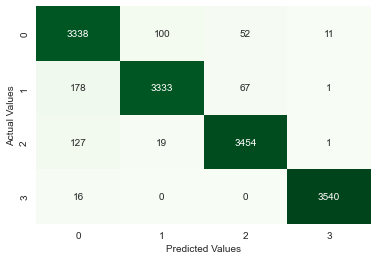

In [188]:
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from MAna import confusion_matrix

# Assuming you have features X and labels y1, y2, y3
y_columns = y_c.columns

# Initialize SMOTE for oversampling and TomekLinks for undersampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
tomek = TomekLinks(sampling_strategy='all')

# Create a dictionary to store balanced data for each target column
balanced_data = {}



# Loop over each target column
for i, y_col in enumerate(y_columns):
    # Balance the data based on the current target column
    X_resampled, y_resampled = smote.fit_resample(X, y_c[y_col])
    X_resampled, y_resampled = tomek.fit_resample(X_resampled, y_resampled)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Save the balanced data in the dictionary
    balanced_data[f'{y_col}_resampled'] = (X_resampled, y_resampled)
    print((len(y_resampled)/len(y_c))*100, f'% of the records used after balancing {y_col}')

    # Define the parameter grid to search over
    params = { 'max_depth': [3,6,10],
            'learning_rate': [0.05, 0.1, 0.3],
            'n_estimators': [100, 500, 1000],
            'colsample_bytree': [0.3, 0.7]}

    # Make predictions on the test set
    base_model = XGBClassifier(random_state=42)

    # Initialize GridSearchCV
    clf = GridSearchCV(estimator=base_model, 
                    param_grid=params,
                    scoring='accuracy', 
                    verbose=1,
                    n_jobs=-1)

    # Fit the GridSearchCV on the training data
    clf.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = clf.best_estimator_
    print(f'XGB best parameters: {clf.best_params_}')

    # Make predictions on the test set using the best model
    predictions = best_model.predict(X_test)

    print(f'XGB Accuracy for {y_col} : {accuracy_score(y_test,predictions)}')
    confusion_matrix(y_test,predictions)

    # Get XGBoost feature importances
    xgb_feature_importances = best_model.feature_importances_
    xgb_feature_importances_dict = {}

    for feature, importance in zip(X_train.columns, xgb_feature_importances):
        xgb_feature_importances_dict[feature] = importance

    # Assuming you have already defined `feature_importances` and `np.abs(feature_importances)`
    xgb_feature_importances = pd.Series(xgb_feature_importances_dict.values(),index=xgb_feature_importances_dict.keys()).abs().sort_values(ascending=False)
    xgb_feature_importances.to_csv(f'{y_col}_fi.csv', header=False)

    best_model.fit(X_resampled, y_resampled)
    xgb_model_filename = f'xgb_model_{y_col}.pkl'
    joblib.dump(best_model, xgb_model_filename)